# 1.Introduction
'In 2022, the revenue from the worldwide gaming market was estimated at almost 347 billion U.S. dollars.'[[1]](#ref-1)Once confined to the stores of arcades and niche enthusiasts, video game as a whole has bloomed into a remarkable industry worth billions of dollars. With the rapid advancement of technology and processing power, video games has evolved as well from humble pixelated graphics to cutting edge graphics rivaling that of cinemas. Various genres of video games exist as well mirroring the diverse interests of various gamers around the globe. Whether they be fans of platformers or role playing games, or even the more casual mobile gamer, each of these contributes to the rising market of the video games industry.

The gaming industry does not consists of merely the games themselves anymore. These days it is a market influenced by technological trends and consumer preferences. Gaming platforms ranges from personal computers to consoles and even mobile phones, all of which contribute to the rising trend of gaming. Many various factors also account for this growing industry. However one of the most crucial aspects is definitely sales. The sales of a video game relect the commercial success of each different title and also higlights consumer trends and the preferences of gamers.

In this coursework I will be delving into the data exploration and analysis of the top selling video games throughout the years. By doing so I hope to get an insight of gaming trends over the years and predict global sales with the aid of a machine learning model. 

## 2.Dataset
In order to achieve my objectives, a dataset related to the sales of video games would definitely be required. The dataset I settled on and used is taken from Kaggle and derieved from scraping the video game site vgchartz which holds the sales data for many various video games. It comprises of approzimately 10000 entries which can act as a good foundation for the analysing sales of video games. The dataset also provides a comprehensive insight of each game's sales performance in each market and each entry includes essential details such as the game's ranking based on global sales (Rank), the game's title (Name), the platform on which it was released (Platform), the release year (Year), the genre it belongs to (Genre), and the game's publisher (Publisher). Sales figures are segmented by region, including North America (NA_Sales), Europe (EU_Sales), Japan (JP_Sales), and other regions (Other_Sales). The culmination of these regional figures yields the total global sales (Global_Sales) for each game. Rank and year is stored as an integer. While Name, Platform, Genre and publishers are stored as strings. Fields relating to sales are stored as float. With its sizeable and manageble number of entries and the richness of its attributes, I believe this dataset is a good resource for the data exploration I am setting out to achieve.

## 3. Data preparation
This section will be focused on the preprocessing of the data. I chose to download the data from Kaggle as a csv file in the event that the page becomes unavailable. The dataset will also need to be checked for any missing values.

In [1]:
# importing relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# reading dataset
dataset = pd.read_csv("videogamesales/vgsales.csv")

#checking the first 5 and last 5 rows
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
dataset.tail()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [4]:
#information of dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
#checking for duplicated values
dataset.duplicated().sum()

0

In [6]:
#check for missing values
dataset.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

For entries with missing values, I have decided to drop them to ensure accuracy and integrity of the dataset. The entries will be dropped using the .dropna method.

In [7]:
#removig entries with missing values
dataset.dropna(inplace=True)

In [8]:
#making sure there are no more missing values
dataset.isnull().sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [10]:
year_counts = dataset['Year'].value_counts().sort_index()
print(year_counts)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
2020.0       1
Name: Year, dtype: int64


While working on the dataset, I noticed that the years 2018 and 2019 were missing from the dataset and there was one entry for the year 2020. The one entry for 2020 could be an outlier and may not give us an accurate representation of the data trends. Thus I have decided to exclude it by dropping it from my datset to prevent skewing. The code below is used to drop the entry from 2020.

In [11]:
dataset = dataset[dataset['Year'] != 2020]
year_counts = dataset['Year'].value_counts().sort_index()
print(year_counts)

1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     349
2001.0     482
2002.0     829
2003.0     775
2004.0     744
2005.0     936
2006.0    1008
2007.0    1201
2008.0    1428
2009.0    1431
2010.0    1257
2011.0    1136
2012.0     655
2013.0     546
2014.0     580
2015.0     614
2016.0     342
2017.0       3
Name: Year, dtype: int64


## 4. Statistical Analysis
This section will focus on the statistical analysis to provide a summary of the data

In [12]:
#show statistical summary
stat_summary = dataset.describe()
print(stat_summary)

               Rank          Year      NA_Sales      EU_Sales      JP_Sales  \
count  16290.000000  16290.000000  16290.000000  16290.000000  16290.000000   
mean    8290.333333   2006.404727      0.265646      0.147740      0.078838   
std     4792.766754      5.831618      0.822457      0.509317      0.311888   
min        1.000000   1980.000000      0.000000      0.000000      0.000000   
25%     4132.250000   2003.000000      0.000000      0.000000      0.000000   
50%     8292.500000   2007.000000      0.080000      0.020000      0.000000   
75%    12439.750000   2010.000000      0.240000      0.110000      0.040000   
max    16600.000000   2017.000000     41.490000     29.020000     10.220000   

        Other_Sales  Global_Sales  
count  16290.000000  16290.000000  
mean       0.048428      0.540926  
std        0.190089      1.567391  
min        0.000000      0.010000  
25%        0.000000      0.060000  
50%        0.010000      0.170000  
75%        0.040000      0.480000  


The values shown above shows a statistical summary of the attributes in the dataset. The values for rank and year should be ignored in this summary as it does not give us any useful information due to the type of value they are. Following this I will be finding the mode of relevant attributes.

In [13]:
mode_genre = dataset['Platform'].mode().values
print(mode_genre)

['DS']


In [14]:
mode_year = dataset['Year'].mode().values
print(mode_year)

[2009.]


In [15]:
mode_genre = dataset['Genre'].mode().values
print(mode_genre)

['Action']


In [16]:
mode_publisher = dataset['Publisher'].mode().values
print(mode_publisher)

['Electronic Arts']


From the mode analysis done above we can deduce the following

-The platform with the most games is the Nintendo DS which is a handheld console released in 2004  <br>
-2009 was the year with the highest amount of video game releases <br>
-Action is the most common genre of video games in this dataset <br>
-Electronic Arts has the most number of games published <br>

### Distribution
Here I will take a look at the type of distribution, this section will focus on Global_Sales and Year. 

In [17]:
#importing skew and kurtosis from scipy
from scipy.stats import skew, kurtosis

#skewness and kurtosis of Globa_Sales
sales_skewness = skew(dataset['Global_Sales'])
sales_kurtosis = kurtosis(dataset['Global_Sales'])

print(f"Skewness of Global_Sales: {sales_skewness}")
print(f"Kurtosis of Global_Sales: {sales_kurtosis}")

Skewness of Global_Sales: 17.302198876364628
Kurtosis of Global_Sales: 595.7857585012134


In [18]:
# skewness and kurtosis for 'Year'
year_skewness = skew(dataset['Year'])
year_kurtosis = kurtosis(dataset['Year'])

print(f"Skewness of Year: {year_skewness}")
print(f"Kurtosis of Year: {year_kurtosis}")

Skewness of Year: -1.0042361315385253
Kurtosis of Year: 1.8450001525166648


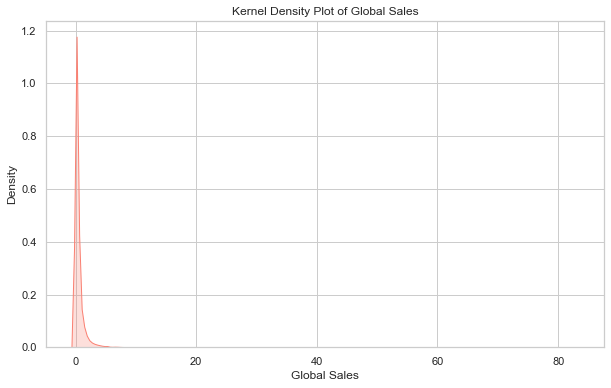

In [19]:
# Plot distribution for 'Global_Sales'
sns.set(style="whitegrid")

# kernel density plot for 'Global_Sales'
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset['Global_Sales'], fill=True, color='salmon')
plt.title('Kernel Density Plot of Global Sales')
plt.xlabel('Global Sales')
plt.ylabel('Density')
plt.show()

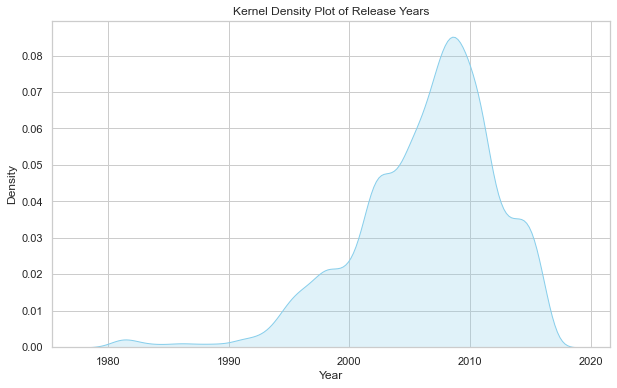

In [20]:
#distribution for 'Year'
sns.set(style="whitegrid")
# kernel density plot for 'Year'
plt.figure(figsize=(10, 6))
sns.kdeplot(dataset['Year'], fill=True, color='skyblue')
plt.title('Kernel Density Plot of Release Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.show()

### Analysing skewness and kurtosis
Using scipy, the kurtosis and skewness can be found easily. Skewness measures the asymmertry of a distribution while kurtosis measures the tail heaviness of a distribution. <br>
From the skewness of Global_sales,it is notably high at 17.3. This suggests that the majority of games have relatively lower sales, with a long right tail containing a smaller number of games achieving exceptionally high sales. The kurtosis value of 595.82 shows an extreme level of tail heaviness suggesting a leptokurtic distribution with a concentration of data points around the mean and a significant number of outliers with exceptionally high global sales. This indicates a highly skewed and heavy-tailed distribution, potentially characterized by a few major title games contributing disproportionately to the total sales. <br>
By comparison, the distribution of release years shows a leftward skew, as indicated by the skewness of 'Year', which is -1.00. This implies that game releases may have historically clustered, with a greater concentration of games in earlier years. In comparison to 'Global_Sales,' the kurtosis value of 1.84 suggests a somewhat leptokurtic distribution, with a greater concentration of games near the mean release year and a less noticeable heavy tail. This may indicate a degree of stability or regularity, but with some variance, in the distribution of game releases throughout time. All these values are supported by their respective kernel density plots.


## 5. Visualisation
This section focuses on the visualisation of key data series. I will mainly be looking at the number of games available for each genre and the sales of video games in each region.

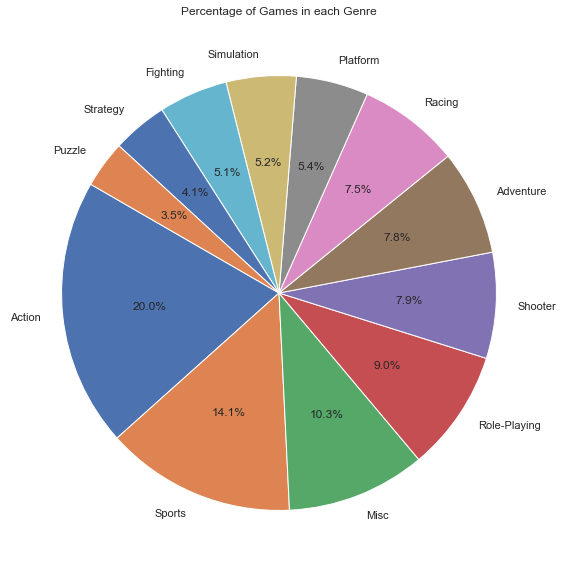

In [21]:
genre_counts = dataset['Genre'].value_counts()

# plotting pie chart showing ppercentage genre
plt.figure(figsize=(10, 10))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=150)
plt.title('Percentage of Games in each Genre')
plt.show()

Previously when finding the mode we already know that action is the most common videogame genre. This is further supported by the pie chart above showing 20% of games are from the action genre. From the pie chart we can also easily see the top five genres in the dataset, which are Action, Sports, Misc, Role-playing and Shooter. We can also see that puzzle and strategy games have the least amount of entries, meaning there are less games of this genre being made.

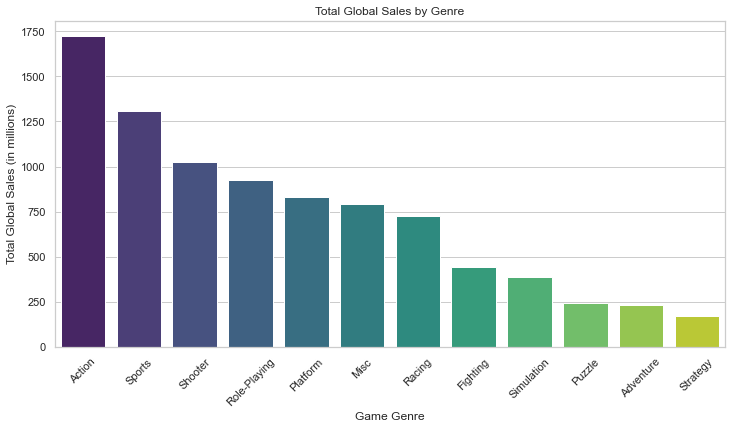

In [22]:
# Calculating total global sales for each genre
genre_sales = dataset.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# plotting a bar graph to show sales by genre
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.index, y=genre_sales.values, palette='viridis')
plt.title('Total Global Sales by Genre')
plt.xlabel('Game Genre')
plt.ylabel('Total Global Sales (in millions)')
plt.xticks(rotation=45)
plt.show()

Looking at the genre sales, we can also see that action is the most successful genre in terms of sales as well followed by sports and shooter games. Despite being 5th on the piechart, shooter games has more sales than games in the role-playing and misc genre. From this we can infer that shooter games are more popular among audiences. Similarly despite only 5.4% of games being from the platform genre, the platform genre still managed to make it at an impressive 5th place for genre sales. From the bar graph we can tell at a glance what the most profitable genres are. This allows us to identify the best selling genres and allow us to understand interests of the general audience in the video game industry. 

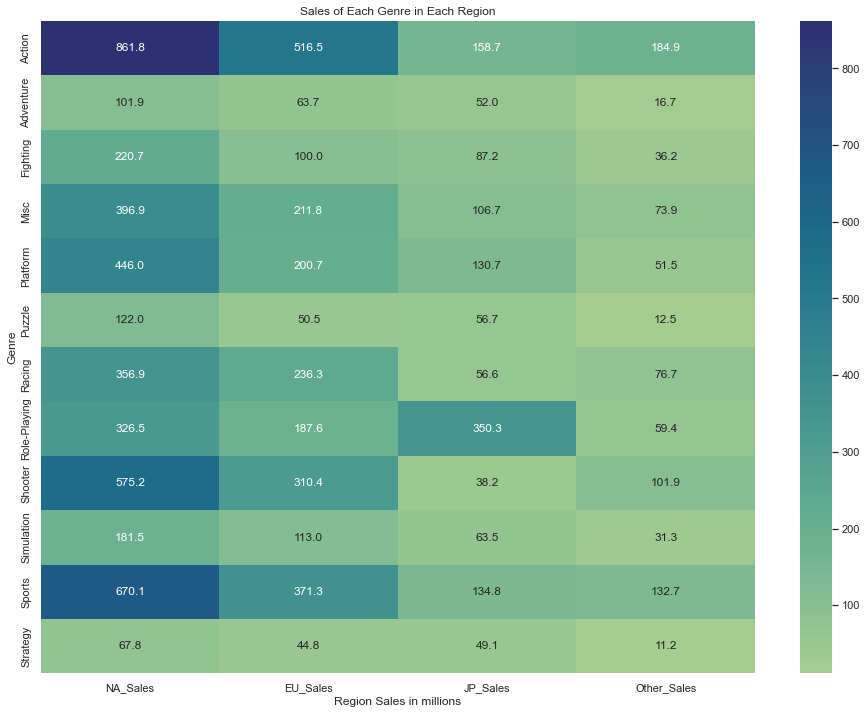

In [23]:
#grouping the various regions together to make it easier to plot
groupedGenre = dataset.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

# Creating heatmap to visualise sale of genres by region
plt.figure(figsize=(16, 12))
sns.heatmap(groupedGenre , annot=True, fmt=".1f", cmap="crest")

plt.title('Sales of Each Genre in Each Region')
plt.xlabel('Region Sales in millions')
plt.ylabel('Genre')
plt.show()

A heat map was also plotted to identify key interests for each region. Each cell in the heatmap represents the sales of a specific genre in a particular region, with color intensity indicating the magnitude of sales.The heatmap also makes it easier to identify differences in the popularity of different genres and geographical preferences, providing insights into market trends and possible commercial plans. For instance Japan is the highest consumer of role-playing games. We can also see that the most popular genres in North America, which accounts for majority of sales is action and sports. With this, we are able to easily identify the key game genres for each region.

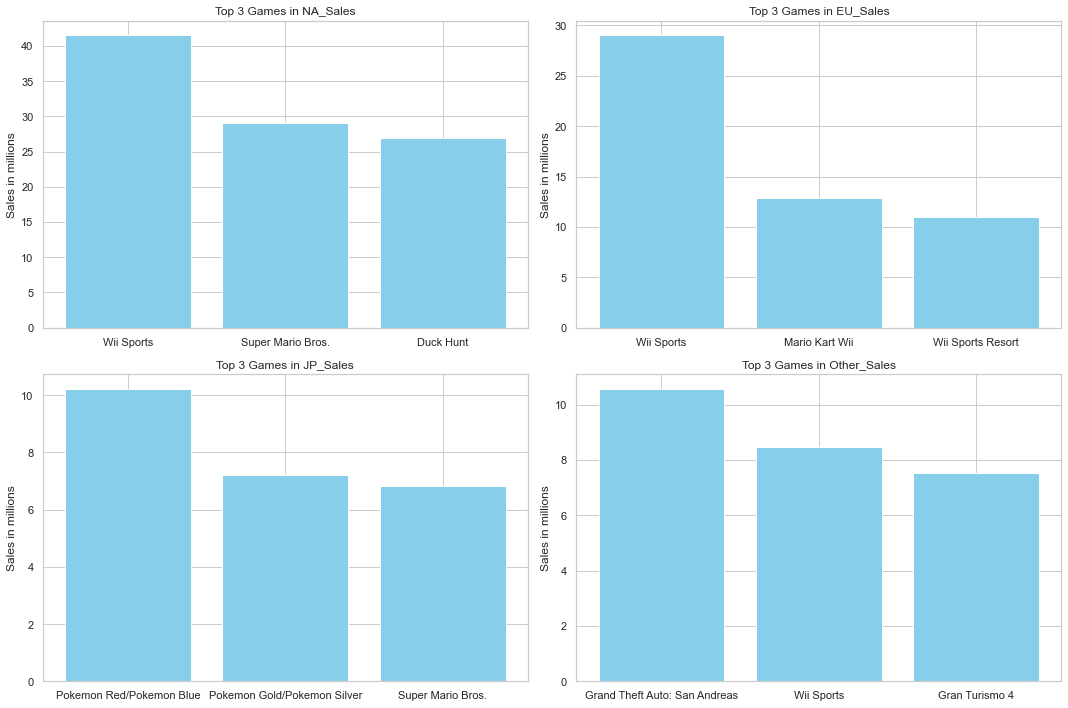

In [24]:
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']

# Create a figure
plt.figure(figsize=(15, 10))

# For each region, get the top 3 games and plot
for i, region in enumerate(regions, 1):
    top_games = dataset.nlargest(3, region)[['Name', region]]
    
    # Create a new subplot for each region
    plt.subplot(2, 2, i)
    
    # Create bar plot
    plt.bar(top_games['Name'], top_games[region], color='skyblue')
    plt.title(f'Top 3 Games in {region}')
    plt.ylabel('Sales in millions')


plt.tight_layout()

# Show the plot
plt.show()

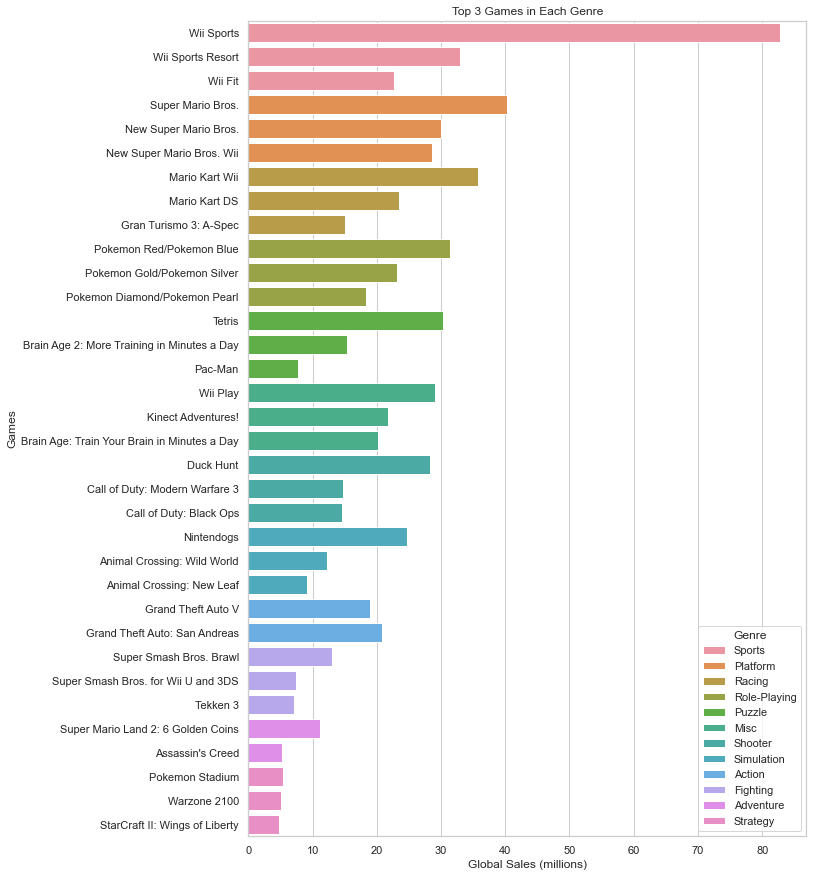

In [25]:
genres = dataset['Genre'].unique()

# Initialize a list to store data
data = []

# For each genre, get the top 3 games based on 'Global_Sales'
for genre in genres:
    top_games = dataset[dataset['Genre'] == genre].nlargest(3, 'Global_Sales')[['Name', 'Global_Sales']]
    for i, row in top_games.iterrows():
        data.append([genre, row['Name'], row['Global_Sales']])

# Convert the list to a DataFrame
plot_data = pd.DataFrame(data, columns=['Genre', 'Game', 'Global_Sales'])

# Create a bar plot
plt.figure(figsize=(10, 15))
sns.barplot(x='Global_Sales', y='Game', hue='Genre', data=plot_data, dodge=False, ci=None)

# Set titles and labels
plt.title('Top 3 Games in Each Genre')
plt.xlabel('Global Sales (millions)')
plt.ylabel('Games')

# Show the plot
plt.show()

## 6.Machine learning
This section will focus on building a machine learning model to try and predict Global_Sales. I opted for a Multi Linear Regression method using Python's scikit learn library. The goal is to predict Global_Sales based on the sales data from various regions. Multi Linear Regression is suited for scenarios where there are multiple independent variables and one dependent variable[[2]](#ref-2). Sales data for various geographical locations were included as they give a good sensing of each regions contributions to the glboal sales. The genre of games and the platform it is released on can also affect the glboal sales, hence they were included as well. The model aims to provide a thorough understanding of the variables influencing the video game sales landscape by quantifying the influence of particular platforms and genres as well as the contribution of sales in each region.

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Mean squared error: 2.80197870667684e-05
Root mean squared error: 0.0052933719939910135
R-squared score: 0.9999934540697245


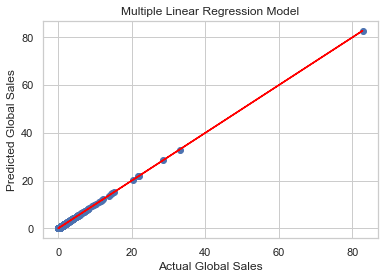

In [27]:
# Independent variables
X = dataset[["Genre", "Platform", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
# Dependent variable
y = dataset["Global_Sales"] 

#one hot encoding
X = pd.get_dummies(X, columns=["Genre", "Platform"], drop_first=True)

#splitting test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#multiple linear regression model
model = LinearRegression()

# Fitting model to training data
model.fit(X_train, y_train)

# predictions on testing data
y_pred = model.predict(X_test)

# Evaluating model performance 
mse = mean_squared_error(y_test, y_pred) # Mean squared error
rmse = np.sqrt(mse) # Root mean squared error
r2 = r2_score(y_test, y_pred) # R-squared score

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2)

# Visualize results
# Scatter plot of actual vs predicted values of global sales
plt.scatter(y_test, y_pred) 

# Calculate the best fit line, where m = slope, b = intercept
m, b = np.polyfit(y_test, y_pred, 1) 

# Add the best fit line to the plot
plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Multiple Linear Regression Model")
plt.show()


Seeing the scores, we can see that the model performed well. The low mean squared error and root mean squared error indicate a high level of precision. The R-squared score being very close to one suggests an almost perfect fit implying that the selected features explain a high proportion of variance in global sales.

## 7.Validation
Next cross-validation will be used to validate the multiple linear regression model. I will be using kfold as it is less bias and easier for my current skill level to implement. [[3]](#ref-3). K-fold cross-validation enables the model to be trained and assessed k times, with each evaluation utilizing a new fold as the test set and the remaining folds as the training set. This helps deal with data variability concerns and makes ensuring that the performance of the model is not reliant on a particular training-test split. Second, , it also offers a more precise evaluation of the model's generalization performance by averaging the outcomes over several iterations.

In [28]:
from sklearn.model_selection import cross_val_score, KFold

In [29]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#linear regression model
model = LinearRegression()

#number of folds for cross-validation
foldNumber = 10 

# Create a cross-validation object (KFold)
kf = KFold(n_splits=foldNumber, shuffle=True, random_state=42)

# Perform k-fold cross-validation and obtain R-squared scores
cross_val_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='r2')

# Print cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

#  average R-squared score
average_r2 = np.mean(cross_val_scores)
print("Average R-squared Score:", average_r2)

Cross-Validation Scores: [0.9999883  0.99999556 0.99998201 0.99998462 0.99998255 0.99997358
 0.99998877 0.99998773 0.99999139 0.9999888 ]
Average R-squared Score: 0.9999863306648962


From the results, we can see that the values are all very close to 1. These results suggest that the model consistently performs exceptionally well on various partitions of the dataset, demonstrating robustness and high generalization capabilities. 

## 8. Feature Engineering
For my feature I have decided on interaction terms. I will be using Genre and Publisher. This is to see if it’s possible that games of a certain genre might sell particularly well when they’re published by a certain publisher. By including this interaction term in the regression model, the model can account for this possibility.

Mean squared error: 2.0591971429232626e+21
Root mean squared error: 45378377482.26861
R-squared score: -4.810657871526354e+20


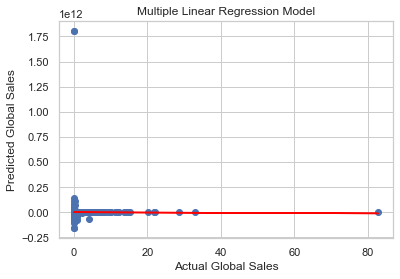

In [30]:
# variables
X = dataset[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales","Platform", "Genre", "Publisher"]].copy()
y = dataset["Global_Sales"]

# Publisher-Genre interaction term
X['Publisher_Genre_Interaction'] = X['Publisher'] + '_' + X['Genre']

# Dropping the original Genre and Publisher columns
X.drop(['Genre', 'Publisher'], axis=1, inplace=True)

# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Creating and training the Multiple Linear Regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Making predictions on the testing data
y_pred = model.predict(X_test_scaled)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2)

# Scatter plot of actual vs predicted values of global sales
plt.scatter(y_test, y_pred) 

# Calculate the best fit line, where m = slope, b = intercept
m, b = np.polyfit(y_test, y_pred, 1) 

# Add the best fit line to the plot
plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Multiple Linear Regression Model")
plt.show()


After introducing the Publisher and Genre interaction term to the linear regression model, it would seem that the model has deteriorated in terms of performance. This is evident from the unusual values which shows a big discrepency in actual and predicted sales as well as poor fitting of the model. To address this, I will be using a different model instead. A random forest regressors model is a potential candidates, as it uses averaging to improve the predictive accuracy and control over-fittings which can hopefully help improve these numbers. [[4]](#ref-4)

Mean squared error: 0.7572211881133121
Root mean squared error: 0.8701845712912359
R-squared score: 0.8230994015506172


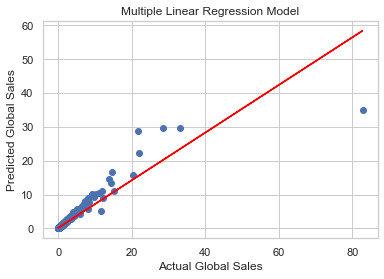

In [31]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the Random Forest Regressor model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions on the testing data
y_pred = rf_model.predict(X_test)

# Evaluating model performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("Mean squared error:", mse)
print("Root mean squared error:", rmse)
print("R-squared score:", r2)

# Scatter plot of actual vs predicted values of global sales
plt.scatter(y_test, y_pred) 

# Calculate the best fit line
m, b = np.polyfit(y_test, y_pred, 1)

# Add the best fit line to the plot
plt.plot(y_test, m*y_test + b, color='red')

plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
plt.title("Multiple Linear Regression Model")
plt.show()

Looking at the scores from the random forest regressor, we can see that it has improved significantly over the previous model. With a significantly smaller Mean Squared Error (MSE) of 0.757, the Random Forest model's predictions are far closer to the actual global sales. This is further supported by the Root Mean Squared Error (RMSE), which has a significantly lower value of 0.87, indicating improved prediction precision for the target variable. Furthermore, the Random Forest model's positive R-squared score of 0.823 indicates that it accounts for about 82.3% of the variance in global sales, demonstrating its ability to better identify underlying patterns in the data when compared to the linear regression model.

## Evaluation
The model in its initial form made use of multiple linear regression(MLR) to predict global sales of video games using various variables. MSE and RMSE are used as they are valuable for evaluating the accuracy of predictions, as they quantify the magnitude of errors between actual and predicted values. Meanwhile R-squared score serves as a crucial measure for assessing the goodness of fit of the model. It provides insights into the proportion of variability in the dependent variable that the model explains. From the scores of the MLR model we can see that it performed well. 

The addition of a Publisher-Genre interaction term through feature engineering shows the attempt to capture more nuanced relationships within the data. The RandomForestRegressor was used, and its evaluation metrics gave insights into its ability to handle non-linear relationships and capture more complex patterns compared to the MLR model. While it did not perform as well as the MLR model it still showed relatively good scores.

Reflecting on the project, it can be said that both models advance our knowledge of predicting video game sales. While the Random Forest Regressor adds complexity through feature engineering and ensemble learning, the MLR model offers a basic linear viewpoint. Hopefully the results can show other game makers and publishers the various factors that contribute to sales. The MLR model is transferrable to other domains where linear relationships are prevalent such as car sales. Meanwhile the random forest regressor model can be used for domains where non-linear patterns are present.

In conclusion, the project offers an evaluation of video game sales prediction models, providing valuable insights for future improvements and potential applications in related domains. I have gleamed a lot from this project and hope to improve upon my data exploratory techniques for the future.

### references

<a id="ref-1">[1]https://www.statista.com/topics/868/video-games/#topicOverview</a> <br>
<a id="ref-2">[2]https://www.scribbr.com/statistics/multiple-linear-regression/</a> <br>
<a id="ref-3">[3]https://machinelearningmastery.com/k-fold-cross-validation/</a> <br>
<a id="ref-4">[4]https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html</a> <br>

## Dataset source
https://www.kaggle.com/datasets/thedevastator/global-video-game-sales